<a href="https://colab.research.google.com/github/deepluckyperson/sber_homework/blob/main/%D0%B4%D0%B72%20%D0%BF%D0%BE%D0%BB%D0%BD%D1%8B%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ДЗ

In [1]:
# загрузим библиотеки
import numpy as np
import pandas as pd

## Задание 1

Создайте массив массив из 100 элементов (от 1 до 100), переформатируйте в формат (10 * 10), сделайте слайсинг с шагом 2 по каждой оси.

In [3]:
x = []
for i in range(1,101):
  x.append(i)
x = np.array(x, dtype=float)
x = x.reshape(10, 10)
x[::2, ::2]


array([[ 1.,  3.,  5.,  7.,  9.],
       [21., 23., 25., 27., 29.],
       [41., 43., 45., 47., 49.],
       [61., 63., 65., 67., 69.],
       [81., 83., 85., 87., 89.]])

## Задание 2

Написать функцию, которая по заданной длине последовательности находит среднее арифметическое ее членов.

Реализуйте задачу с и без помощи numpy, сравните время выполнения

In [4]:
# решение с использованием numpy
# для оценки времени исоплнения блока
%%time
# зададим длину нашей последовательности
dlina_posl = 100_000_000

def aver(arr):
  x = np.arange (0, arr)
  y = np.mean(x)
  print (y)

aver(dlina_posl)

# ваш код тут


49999999.5
CPU times: user 321 ms, sys: 344 ms, total: 664 ms
Wall time: 667 ms


In [5]:
# решение без использования numpy
# для оценки времени исоплнения блока
%%time


# ваш код тут

def aver1(arr):
  ls = [i for i in range(0, arr)]
  s = 0
  for x in ls:
    s += x
  s /= len(ls)  
  print (s)

aver1(dlina_posl)

49999999.5
CPU times: user 9.1 s, sys: 3.15 s, total: 12.2 s
Wall time: 12.3 s


## Задание 3 *(необязательно)

Задан Series объект s, найти индекс первого элемента отсортированного s, где значения больше 5

In [6]:
# задано изначально
r = np.random.RandomState(1)
s = pd.Series(r.uniform(0, 10, 100))
s = s.sort_values()
s[s>5].index[0]



67

## Задание 4

Предположим, что мы наблюдаем за некоторым признаком нашего датасета, но в данных есть пропуски. Ваша задача: реализовать алгоритм заполнения пропущенных значений последним известным с помощью средств python и pandas. (подсказка: вам может помочь функция np.isnan(), которая возвращает True, если число - nan. Для реализации с пандас стоит посмотреть на метод .fillna).

Изначальный код с инициализацией такого датасета предоставлен.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  100 non-null    float64
dtypes: float64(1)
memory usage: 928.0 bytes


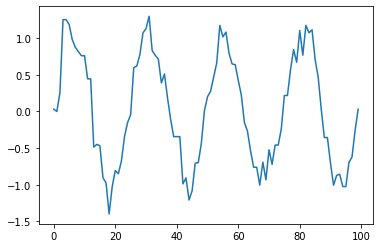

In [25]:
# импортируем библиотеку для создания шума
import random
# библиотека для визуализации
import matplotlib.pyplot as plt

# создадим наши данные и добавим к каждой точке синусоиды случайный шум
a = np.linspace(0, 25, 100)
a = np.sin(a) + [random.gauss(0, 0.2) for i in range(len(a))]

# создадим 10 случайных пропусков
for i in range(10):
    a[random.randint(0, len(a) - 1)] = None
# создадим датафрейм
df = pd.DataFrame({'target':a})

# ваш код тут

#python
for ind, val in np.ndenumerate(df.values):
    if np.isnan(val):
        ind = np.array(ind)
        df.values[ind] = df.values[ind -1]


#pandas
df.fillna(method = 'ffill', inplace = True)
pd.isnull(df)
df.info()

# отобразим

plt.plot(df.target.values)

## Задание 5 *(необязательно)

Имеется небольшой игрушечный датафрейм, в котором необходимо провести несколько типов фильтраций (ответы ищите в решениях) и отобразить результат:

* всех, кто старше 40
* всех, кто имеет доход выше среднего по датасету
* всех, кто имеет доход выше среднего по датасету, но надежность ниже среднего по датасету

создать новые столбцы:

* важность клиента = доход * надежность
* возможная долгосрочность клиента = важность клиента * (средний возраст по датасету - возраст клиента)

`подсказка: двойные условия записываются так: (условие 1) & (условие 2)`


** примечание: столбцы не имеют отношения к реальным формулам или моделям, они необходимы только для наглядности

In [8]:
# создадим тестовый датасет
df = pd.DataFrame({
    'имя': ['Петя', 'Вася', 'Аня', 'Света'],
    'возраст': [45, 26, 41 , 21],
    'доход': [100000, 80000, 150000, 60000],
    'надежность клиента (0..1)': [0.65, 0.74, 0.87, 0.68],
    'пол': ['муж', 'муж', 'жен', 'жен']},
    index=[0, 1, 2, 3])

# ваш код тут
print(df[df.iloc[:, 1] > 40])
print()
print(df[df.iloc[:, 2] > np.mean(df.iloc[:, 2].values)])
print()
print(df[(df.iloc[:, 2] > np.mean(df.iloc[:, 2].values)) & (df.iloc[:, 3] < np.mean(df.iloc[:, 3].values))])

df["важность клиента"] = df.iloc[:, 2] * df.iloc[:, 3]
df["возможная долгосрочность клиента"] = df.iloc[:, 5] * (np.mean(df.iloc[:, 1].values) - df.iloc[:, 1])

df

    имя  возраст   доход  надежность клиента (0..1)  пол
0  Петя       45  100000                       0.65  муж
2   Аня       41  150000                       0.87  жен

    имя  возраст   доход  надежность клиента (0..1)  пол
0  Петя       45  100000                       0.65  муж
2   Аня       41  150000                       0.87  жен

    имя  возраст   доход  надежность клиента (0..1)  пол
0  Петя       45  100000                       0.65  муж


,имя,возраст,доход,надежность клиента (0..1),пол,важность клиента,возможная долгосрочность клиента
0,Петя,45,100000,0.65,муж,65000.0,-763750.0
1,Вася,26,80000,0.74,муж,59200.0,429200.0
2,Аня,41,150000,0.87,жен,130500.0,-1011375.0
3,Света,21,60000,0.68,жен,40800.0,499800.0
